# Scopus извлечение данных

Данные извлекаются при помощи [про API Scopus](https://elsevierscience.ru/files/ScopusAPI_QRG_Rus.pdf). Можно парсить самостоятельно ([пример](https://stackoverflow.com/questions/30513808/scopus-keywords-and-citations-crawling) как это делать).

Есть библиотека **[pybliometrics](https://pybliometrics.readthedocs.io/en/stable/examples/ScopusSearch.html)**-это простая в использовании библиотека Python для извлечения, кэширования данных из Scopus. Установка командой ```!pip install pybliometrics``` или ```!pip install git+https://github.com/pybliometrics-dev/pybliometrics```

Также для использования pybliometrics я получила у Scopus institutional token для расширенного доступа к БД. Это инфо добавляется вручную в файл config.ini следующим образом:\
[Authentication]\
APIKey = \*\*\*\*\
InstToken = ***

Можно указать несколько ключей и из токенов через запятую. Тогда при превышении лимитов pybliometrics будет использовать другой ключ.

**Подробнее про лимиты**

Данная информация получена из [**переписки с разработчкима pybliometrics**](https://github.com/pybliometrics-dev/pybliometrics/issues/192)

ScopusApi прредоставляет слудующие [лимиты](https://www.elsevier.com/de-de/events/scopus-community-anwendertreffen?a=917179) на запросы:
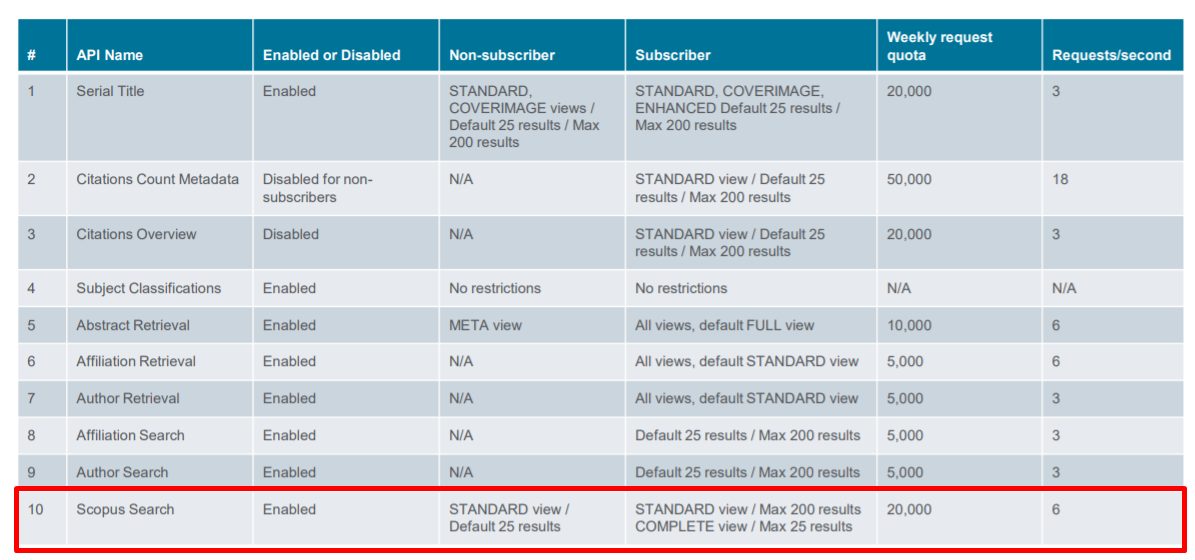

Институциональный токен фактически дает права подписчика. В зависимости от того, какое представление использовать при запросе (COMPLETE ИЛИ STANDART) рассчитывается итоговое количество страниц результатов:

Те если запрос возвращает 30 822, то для представления COMPLETE - это будет 30,822/25 ~1233 страниц результатов. Для представления STANDART 30 822/200 ~ 155 страниц результатов. Однако представление STANDART дает меньше полей. Всего подписчику в течении недели доступно 20000 страниц. Результаты запросов при параметре download=True, сохраняются в кэш.

**Образование**

In [ ]:
from pybliometrics.scopus import ScopusSearch

# other = ScopusSearch('TITLE({machine learning})', download=False)
other_more2020 = ScopusSearch('TITLE-ABS-KEY( educat*  OR  learn*  OR  teach  OR  student* )  AND  SUBJAREA ( soci )  AND  PUBYEAR  >  2020', download=True)

# other.get_results_size()

# other_more2020.get_key_remaining_quota() 

**HR**

Поиск в отрасли знаний Бизнес, менеджмент и бухгалтерское дело (BUSI), ищем в названии, кратком описании (abstract) и ключах следующие слова и словосочетания:\
personnel OR staff OR HR OR (human AND resources) OR employee OR organizational OR performance OR HR OR HRM OR (resource AND management) OR (collective AND staff) OR (personnel AND department) OR hrm OR hr OR workforce OR manpower) 


Запрос HR данные старше 2016 года не включительно:\
```ScopusSearch('TITLE-ABS-KEY( personnel OR staff OR HR OR (human AND resources) OR employee OR organizational OR performance OR HR OR HRM OR (resource AND management) OR (collective AND staff) OR (personnel AND department) OR hrm OR hr OR workforce OR manpower) AND SUBJAREA (busi) AND PUBYEAR > 2016',subscriber=True,view='STANDARD')```

Запрос HR данные безограничения по годам:\

```hr_data = ScopusSearch('TITLE-ABS-KEY( personnel OR staff OR HR OR (human AND resources) OR employee OR organizational OR performance OR HR OR HRM OR (resource AND management) OR (collective AND staff) OR (personnel AND department) OR hrm OR hr OR workforce OR manpower) AND SUBJAREA (busi)',subscriber=True,view='STANDARD') ```

In [1]:
from pybliometrics.scopus import ScopusSearch
import pandas as pd
other_more2016 = ScopusSearch('TITLE-ABS-KEY( personnel OR staff OR HR OR (human AND resources) OR employee OR organizational OR performance OR HR OR HRM OR (resource AND management) OR (collective AND staff) OR (personnel AND department) OR hrm OR hr OR workforce OR manpower) AND SUBJAREA (busi) AND PUBYEAR > 2016',subscriber=True,view='STANDARD')


print(other_more2016.get_key_reset_time())
print(other_more2016.get_key_remaining_quota())
print(other_more2016.get_results_size())

df_more2016 = pd.DataFrame(pd.DataFrame(other_more2016.results))
df_more2016.to_csv('scopus_api_query_hr_2016')

2021-05-11 09:49:56
19392
121552


In [7]:
from pybliometrics.scopus import ScopusSearch

hr_data = ScopusSearch('TITLE-ABS-KEY( personnel OR staff OR HR OR (human AND resources) OR employee OR organizational OR performance OR HR OR HRM OR (resource AND management) OR (collective AND staff) OR (personnel AND department) OR hrm OR hr OR workforce OR manpower) AND SUBJAREA (busi)',subscriber=True,view='STANDARD')


print(hr_data.get_key_reset_time())
print(hr_data.get_key_remaining_quota())
print(hr_data.get_results_size())

df_hr = pd.DataFrame(pd.DataFrame(hr_data.results))
df_hr.to_csv('scopus_api_query_hr_all')

2021-05-11 09:49:56
17340
410061


да будет функция для выгрузки

In [15]:
def pybliometrics_extract_save_csv(query,file_name,view_type='STANDARD'):
    
    """ Function wich extraxt data from scopus,save it to cashe and csv file
        
        Parameters
        ----------
        query     : str, scopus query
        
        file_name : str, name for csv file
            
        view_type : str, two options of this parametr is availible: STANDARD(200 batches) and COMPLETE(25 batches), 
                    but COMPLETE view have more attributes 
                    
        Returns
        -------
        df      : DataFrame pandas, query result"""
    
    
    import pandas as pd
    from pybliometrics.scopus import ScopusSearch
    
    query_result = ScopusSearch(query,subscriber=True,view=view_type)
    print(query_result.get_key_reset_time()) # время обновления
    print(query_result.get_key_remaining_quota()) # остаток от лимита
    print(query_result.get_results_size()) #кол-во строк, не страниц в результате запроса
    df = pd.DataFrame(pd.DataFrame(query_result.results))
    df.to_csv(file_name)

    

pybliometrics_extract_save_csv('TITLE-ABS-KEY( personnel OR staff OR HR OR (human AND resources) OR employee OR organizational OR performance OR HR OR HRM OR (resource AND management) OR (collective AND staff) OR (personnel AND department) OR hrm OR hr OR workforce OR manpower) AND SUBJAREA (busi) AND PUBYEAR > 2016','scopus_api_query_hr_2016_complete',view_type='COMPLETE')

2021-05-11 09:49:56
12464
121867


# Проверка загруженных данных

In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('scopus_api_query_hr_2016')
print(data.columns)
print('\033[1mПропущено значений в authkeywords:\033[0m{}%'.format(round(data['authkeywords'].isnull().sum()/data.shape[0]*100,2)))

Index(['Unnamed: 0', 'eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype',
       'subtypeDescription', 'creator', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'coverDate',
       'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn',
       'aggregationType', 'volume', 'issueIdentifier', 'article_number',
       'pageRange', 'description', 'authkeywords', 'citedby_count',
       'openaccess', 'fund_acr', 'fund_no', 'fund_sponsor'],
      dtype='object')
Пропущено значений в authkeywords:100.0%


In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data_complete = pd.read_csv('scopus_api_query_hr_2016_complete')
print(data_complete.columns)
print('\033[1mПропущено значений в authkeywords:\033[0m{}%'.format(round(data_complete['authkeywords'].isnull().sum()/data_complete.shape[0]*100,2)))

Index(['Unnamed: 0', 'eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype',
       'subtypeDescription', 'creator', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'coverDate',
       'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn',
       'aggregationType', 'volume', 'issueIdentifier', 'article_number',
       'pageRange', 'description', 'authkeywords', 'citedby_count',
       'openaccess', 'fund_acr', 'fund_no', 'fund_sponsor'],
      dtype='object')
Пропущено значений в authkeywords:11.42


**Вывод:** использовать complete view для выгрузки

In [25]:
data_complete.head(3)

,Unnamed: 0,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,affiliation_city,affiliation_country,author_count,author_names,author_ids,author_afids,coverDate,coverDisplayDate,publicationName,issn,source_id,eIssn,aggregationType,volume,issueIdentifier,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor
0,0,2-s2.0-85099827619,10.47836/PJSSH.28.4.05,NaN,NaN,Trust your abilities more than the stereotype:...,ar,Article,Wulandari S.,60069377,Universitas Indonesia,Depok,Indonesia,2.0,"Wulandari, Sri;Hendrawan, Donny",57221692333;36102856000,60069377;60069377,2021-12-25,25 December 2021,Pertanika Journal of Social Sciences and Human...,01287702,19600162021,22318534,Journal,28,4,NaN,2567-2588,Gender-stereotype threat consistently accounts...,Clustering | Gender-stereotype threat | Letter...,0,1,NaN,undefined,NaN
1,1,2-s2.0-85099820857,10.47836/PJSSH.28.4.28,NaN,NaN,Rewriting the feminine construction of a natio...,ar,Article,Fun C.S.,60000906,Universiti Sains Malaysia,Gelugor,Malaysia,1.0,"Fun, Chow Sheat",57221701974,60000906,2021-12-25,25 December 2021,Pertanika Journal of Social Sciences and Human...,01287702,19600162021,22318534,Journal,28,4,NaN,2989-3002,"This essay highlights the way Keller's novel, ...",Comfort woman | National identity | Passivity ...,0,1,NaN,undefined,NaN
2,2,2-s2.0-85099849840,10.11118/EJOBSAT.V5I2.175,NaN,NaN,Smart information system capabilities of digit...,ar,Article,Nürk J.,60072347;60004261,SAP AG;Mendelova univerzita v Brne,Walldorf;Brno,Germany;Czech Republic,1.0,"Nürk, Jochen",57221686182,60004261-60072347,2021-12-23,23 December 2021,European Journal of Business Science and Techn...,23366494,21101034343,26947161,Journal,5,2,NaN,143-184,This study explores how supply chain managemen...,Alignment | Artefacts | Capabilities | Industr...,0,1,NaN,undefined,NaN


**Выгрузки при помощи GUI ScopusSearch**

In [2]:
import pandas as pd

data_gui = pd.read_csv('scopus.csv')
print(data_gui.shape)
print(data_gui.columns,len(data_gui.columns))
data_gui.head(3)

(2000, 24)
Index(['Авторы', 'Идентификатор автора(ов)', 'Название', 'Год',
       'Название источника', 'Том', 'Выпуск ', 'Статья №', 'Страница начала',
       'Страница окончания', 'Количество страниц', 'Цитирования', 'DOI',
       'Ссылка', 'Краткое описание', 'Ключевые слова автора',
       'Ключевые слова указателя', 'Язык оригинального документа',
       'Сокращенное название источника', 'Тип документа', 'Стадия публикации',
       'Open Access (открытый доступ)', 'Источник', 'EID'],
      dtype='object') 24


,Авторы,Идентификатор автора(ов),Название,Год,Название источника,Том,Выпуск,Статья №,Страница начала,Страница окончания,...,Краткое описание,Ключевые слова автора,Ключевые слова указателя,Язык оригинального документа,Сокращенное название источника,Тип документа,Стадия публикации,Open Access (открытый доступ),Источник,EID
0,"Jiang Y., Liu Q., Zhu B., Pan S.",57195673336;57203906986;57222704952;57222705322;,Correlation analysis of machine performance pa...,2023,Journal of Testing and Evaluation,51.0,1,JTE20200639,NaN,NaN,...,A rock breaking process during the tunnel bori...,Correlation analysis; Machine parameters; Rock...,Construction equipment; Correlation methods; E...,English,J Test Eval,Article,Final,NaN,Scopus,2-s2.0-85103742067
1,"Chen X., Yu F., Hong Z.-M., Pan L.-F., Liu X.-...",57222498013;56949611700;57222497901;5722248726...,Comparative investigation on the curing behavi...,2023,Journal of Testing and Evaluation,51.0,1,631,NaN,NaN,...,"In recent years, transportation engineering an...",Cemented soil; Gypsum-slag soil hardening agen...,Curing; Energy dispersive spectroscopy; Green ...,English,J Test Eval,Article,Final,NaN,Scopus,2-s2.0-85102879835
2,"Feng L., Xu S., Zhang K., Chai Y., Huang D.",57199898373;57190881125;57213293527;5722238302...,Fault estimation based on high order iterative...,2022,Science China Information Sciences,65.0,7,179202,NaN,NaN,...,[краткое описание не найдено],NaN,NaN,English,Sci. China Inf. Sci.,Letter,Final,"All Open Access, Bronze",Scopus,2-s2.0-85102944905


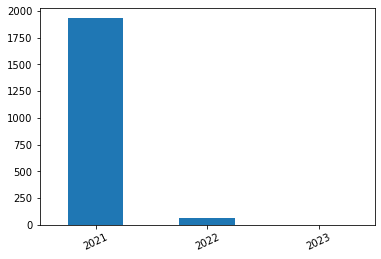

2021    1935
2022      63
2023       2
Name: Год, dtype: int64

In [3]:

import matplotlib.pyplot as plt

data['Год'].value_counts().plot.bar()
plt.xticks(rotation=25)

plt.show()
data['Год'].value_counts().T

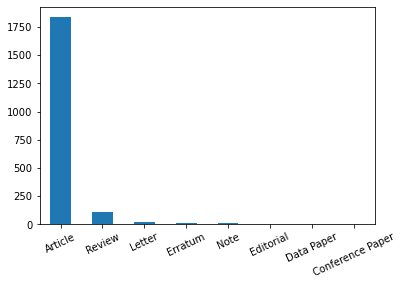

Article             1835
Review               112
Letter                20
Erratum               17
Note                  10
Editorial              2
Data Paper             2
Conference Paper       2
Name: Тип документа, dtype: int64

In [4]:
data['Тип документа'].value_counts().plot.bar()
plt.xticks(rotation=25)

plt.show()
data['Тип документа'].value_counts()

In [5]:

data['Стадия публикации'].value_counts()

Final    2000
Name: Стадия публикации, dtype: int64

In [6]:
data['Источник'].value_counts()

Scopus    2000
Name: Источник, dtype: int64

In [7]:
data.describe(include='all')

,Авторы,Идентификатор автора(ов),Название,Год,Название источника,Том,Выпуск,Статья №,Страница начала,Страница окончания,...,Краткое описание,Ключевые слова автора,Ключевые слова указателя,Язык оригинального документа,Сокращенное название источника,Тип документа,Стадия публикации,Open Access (открытый доступ),Источник,EID
count,2000,2000,2000,2000.000000,2000,1995.000000,1973,1721,261.000000,259.000000,...,2000,1592,1241,2000,2000,2000,2000,1745,2000,2000
unique,1992,1993,2000,NaN,325,NaN,25,603,NaN,NaN,...,1969,1592,1229,6,325,8,1,7,1,2000
top,"Konaszewski K., Niesiobędzka M., Surzykiewicz J.",57189035390;57221675245;46461672000;,Preoperative risk factors including serum leve...,NaN,Scientific Reports,NaN,1,2,NaN,NaN,...,[краткое описание не найдено],College students; COVID-19; Depressive symptom...,erratum,English,Sci. Rep.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85103155037
freq,2,2,1,NaN,165,NaN,1725,35,NaN,NaN,...,32,1,13,1972,165,1835,2000,1149,2000,1
mean,NaN,NaN,NaN,2021.033500,NaN,33.356391,NaN,NaN,6506.865900,6562.181467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.185459,NaN,105.203394,NaN,NaN,11941.493999,11975.926738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2021.000000,NaN,2.000000,NaN,NaN,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2021.000000,NaN,14.000000,NaN,NaN,107.000000,122.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2021.000000,NaN,21.000000,NaN,NaN,359.000000,367.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,21.000000,NaN,NaN,4376.000000,4380.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

Авторы                               0
Идентификатор автора(ов)             0
Название                             0
Год                                  0
Название источника                   0
Том                                  5
Выпуск                              27
Статья №                           279
Страница начала                   1739
Страница окончания                1741
Количество страниц                2000
Цитирования                       1834
DOI                                 15
Ссылка                               0
Краткое описание                     0
Ключевые слова автора              408
Ключевые слова указателя           759
Язык оригинального документа         0
Сокращенное название источника       0
Тип документа                        0
Стадия публикации                    0
Open Access (открытый доступ)      255
Источник                             0
EID                                  0
dtype: int64

In [9]:
data['Краткое описание'][data['Краткое описание']=='[краткое описание не найдено]'].value_counts()

[краткое описание не найдено]    32
Name: Краткое описание, dtype: int64

In [10]:
keywords = data['Ключевые слова автора'].str.lower()

In [11]:
import numpy as np
# keywords = data['Ключевые слова автора'].str.lower()+';'+data['Ключевые слова указателя'].str.lower()
# keywords[2]

keywords = np.where(data['Ключевые слова автора'].isnull()==True, data['Ключевые слова указателя'].str.lower(),
         np.where(data['Ключевые слова указателя'].isnull()==True, data['Ключевые слова автора'].str.lower(),
         data['Ключевые слова автора'].str.lower()+';'+data['Ключевые слова указателя'].str.lower()))
keywords = pd.Series(keywords)
keywords = keywords.loc[~pd.isna(keywords)]
print(keywords[~pd.isna(keywords)].shape[0])
print('Проверка количества значений.',
    (keywords[~pd.isna(keywords)].shape[0])==(2000-data[(data['Ключевые слова автора'].isnull()==True)&(data['Ключевые слова указателя'].isnull()==True)].shape[0]))

keywords = keywords.str.split(';')
keywords = keywords.apply(set)

1836
Проверка количества значений. True


In [12]:
keywords[0]

{' boring machines (machine tools)',
 ' correlation methods',
 ' excavation',
 ' excavation sequences',
 ' life cycle',
 ' low life cycle costs',
 ' machine parameters',
 ' multivariate linear regression analysis',
 ' predictive analytics',
 ' rock mass properties',
 ' rock mechanics',
 ' rock quality designation indices',
 ' rocks',
 ' statistical prediction model',
 ' tunnel boring machine',
 ' tunnel boring machine(tbm)',
 ' tunnel boring machines',
 ' tunneling machines',
 ' uni-axial compression',
 ' yin-song headrace tunnel',
 'construction equipment',
 'correlation analysis'}

In [181]:
len(keywords.apply(set)[0])

22

In [213]:
import nltk
nltk.download('punkt')

# nltk.word_tokenize(keywords.apply(str))

from nltk.tokenize import word_tokenize as WordTokenizer

def word_tokenizer(data):
    token=[]
    for item in data:
         token.append(WordTokenizer(item))

    return token

token = word_tokenizer(keywords.apply(str))
token


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snkna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['{',
  "'",
  'rock',
  'quality',
  'designation',
  'indices',
  "'",
  ',',
  "'",
  'uni-axial',
  'compression',
  "'",
  ',',
  "'",
  'rocks',
  "'",
  ',',
  "'",
  'rock',
  'mechanics',
  "'",
  ',',
  "'",
  'excavation',
  'sequences',
  "'",
  ',',
  "'",
  'excavation',
  "'",
  ',',
  "'",
  'low',
  'life',
  'cycle',
  'costs',
  "'",
  ',',
  "'correlation",
  'analysis',
  "'",
  ',',
  "'",
  'rock',
  'mass',
  'properties',
  "'",
  ',',
  "'construction",
  'equipment',
  "'",
  ',',
  "'",
  'statistical',
  'prediction',
  'model',
  "'",
  ',',
  "'",
  'tunnel',
  'boring',
  'machines',
  "'",
  ',',
  "'",
  'yin-song',
  'headrace',
  'tunnel',
  "'",
  ',',
  "'",
  'tunneling',
  'machines',
  "'",
  ',',
  "'",
  'machine',
  'parameters',
  "'",
  ',',
  "'",
  'multivariate',
  'linear',
  'regression',
  'analysis',
  "'",
  ',',
  "'",
  'tunnel',
  'boring',
  'machine',
  "'",
  ',',
  "'",
  'boring',
  'machines',
  '(',
  'machine',
  'tools'

In [211]:
str(keywords.apply(list)[0])

"[' rock quality designation indices', ' uni-axial compression', ' rocks', ' rock mechanics', ' excavation sequences', ' excavation', ' low life cycle costs', 'correlation analysis', ' rock mass properties', 'construction equipment', ' statistical prediction model', ' tunnel boring machines', ' yin-song headrace tunnel', ' tunneling machines', ' machine parameters', ' multivariate linear regression analysis', ' tunnel boring machine', ' boring machines (machine tools)', ' predictive analytics', ' correlation methods', ' tunnel boring machine(tbm)', ' life cycle']"